# This draft is use for Monte Carlo Simulations

## Return Function
our simulate function is given by 3-factor model for excess returns $r_{t+1}$,for t = 1,2,....,180;i = 1,2,....,200:

\begin{equation}
r_{t+1} = g^*(z_{i,t}) + e_{i,t+1}
\end{equation}
where return is formed by Characteristics Function and non-independent error terms 

## Characteristics Function
\begin{equation}
z_{i,t} = (1,x_{t})'\otimes c_{i,t}
\end{equation}
### where $x_{t}$:

\begin{equation}
x_{t} = \rho*x_{t-1} + u_{t}
\end{equation}
**Distribution is defined as follows **：

* $x_{0} = 0$

* $\rho = 0.95$

* $u_{t}\sim \mathcal{N}(0,1-\rho^2)$

### where $c_{i,t}$ is define by Equation (4)&(5) :

\begin{equation}
c_{ij,t} = \frac{2}{n+1}rank(\overline{c}_{ij,t})-1
\end{equation}

\begin{equation}
\overline{c}_{ij,t} = \rho_{j}\overline{c}_{ij,t-1} + \epsilon_{ij,t}
\end{equation}

**Distribution is defined as follows**：
* $c_{0} = 0$
* $\rho_{j} \sim \mathcal{U}(0.9,1)$
* $\epsilon_{ij,t} \sim \mathcal{N}(0,1)$


## non-independent error terms
\begin{equation}
e_{i,t+1} = \beta_{i,t}v_{i,t+1} + \varepsilon_{i,t+1}
\end{equation}

### where $\beta_{i,t}$ is given by：


\begin{equation}
\beta_{i,t} = (c_{i1,t},c_{i2,t},c_{i3,t})
\end{equation}

**Distribution is defined as follows**：
* $v_{t+1} \sim \mathcal{N}(0,0.05^2 \times I_{3})$
* $\varepsilon_{i,t+1} \sim t_{5}(0,0.05^2)$

## Distribution for Simulation

* $\mathcal{N}(0,0.05^2)$ stand for normal distribution with 0 mean & 0.05 Standard deviation
* $\mathcal{U}(0.9,1)$ stand for uniform distribution between (0.9,1)
* $t_{5}(0,0.05^2)$ stand for a Student’s t distribution with 5 degrees of freedom 0 mean & 0.05 Standard deviation




# Code for Check Distribution 
## Normal Distribution

The probability density for the Gaussian distribution is

$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$
```
scipy.stats.norm.rvs(loc=0, scale=1, size=1, random_state=None)

loc : float or array_like of floats
Mean (“centre”) of the distribution.

scale : float or array_like of floats
Standard deviation (spread or “width”) of the distribution.

size : int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

```

In [1]:
from scipy.stats import norm

data_mean = 0
data_std = 0.05
data_size = 10000
random_seed = 123

data_norm = norm.rvs(loc=data_mean, scale=data_std, size=data_size, random_state=random_seed)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_hist(data,num=30):
    fig, ax = plt.subplots(1, 1)
    plt.hist(data,num)
    plt.grid(True,ls='--')
    ax = plt.gca()
    ax.spines['top'].set_visible(False) #去掉上边框
    ax.spines['right'].set_visible(False) #去掉右边框
    plt.show()

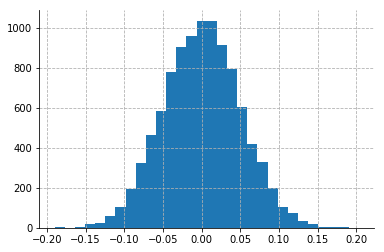

In [3]:
plot_hist(data_norm)

## Uniform Distribution
The probability density function of the uniform distribution is

$p(x) = \frac{1}{b - a}$
```
scipy.stats.uniform.rvs(loc=0, scale=1, size=1, random_state=None)

This distribution is constant between loc and loc + scale
```

In [4]:
from scipy.stats import uniform

data_low = 0.9
data_scale = 0.1
data_size = 10000
random_seed = 123

data_uniform = uniform.rvs(loc=data_low, scale=data_scale, size=data_size, random_state=random_seed)

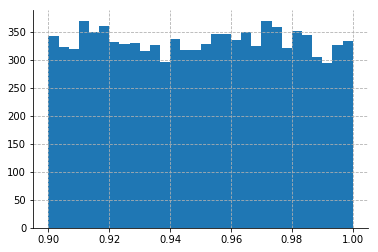

In [5]:
plot_hist(data_uniform)

## Student’s t distribution Distribution
The probability density function of the Student’s t distribution is
                               

$P(x, df) = \frac{\Gamma(\frac{df+1}{2})}{\sqrt{\pi df} \Gamma(\frac{df}{2})}\Bigl( 1+\frac{x^2}{df} \Bigr)^{-(df+1)/2}$

```
scipy.stats.t.rvs(loc=0, scale=1, size=1, random_state=None)

rvs(df, loc=0, scale=1, size=1, random_state=None)
df is freedom
```

In [6]:
from scipy.stats import t
data_fr = 5
data_mean = 0
data_scale = 0.05
data_size = 10000
random_seed = 123

data_t = t.rvs(df=data_fr, loc=data_mean, scale=data_scale, size=data_size, random_state=random_seed)

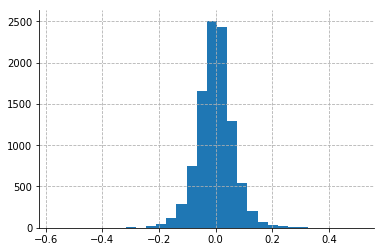

In [7]:
plot_hist(data_t)

# Code for MC Simulation Data
## What is Our final data looks like?


In [8]:
import pandas as pd
import numpy as np
import pickle
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
Path = 'D:\\APViaML'
from scipy.stats import norm
from scipy.stats import t

# 0 set size & df
T_num = 180
id_num = 200
Xt_list = ['x1']
pc1 = 50
pc2 = 100
temp = list(range(1, pc1 + 1))
ct_list = []
for x in temp:
    ct_list.append('c' + str(x))
other_columns_name = ['gz1', 'gz2', 'e', 'ret']
columns_name = Xt_list + ct_list + other_columns_name

final_data = pd.DataFrame(columns=columns_name)

## simulate x1
### where $x_{t}$:

\begin{equation}
x_{t} = \rho*x_{t-1} + u_{t}
\end{equation}
**Distribution is defined as follows** ：

* $x_{0} = 0$

* $\rho = 0.95$

* $u_{t}\sim \mathcal{N}(0,1-\rho^2)$
### define x1,x1_0

In [9]:
x1 = np.zeros(shape=T_num * id_num)
x1_0 = np.zeros(shape=id_num)

### simulate $u_{1t}$

In [10]:
from scipy.stats import norm
import math 
p = 0.95
data_mean = 0
data_std = math.sqrt(1 - 0.95 * 0.95)
data_size = T_num
random_seed1 = 12

u1_t_array = norm.rvs(loc=data_mean, scale=data_std, size=data_size, random_state=random_seed1)

### simulate data

In [11]:
for i in range(T_num):
    if i == 0:
        temp_x_1 = x1_0 * p + u1_t_array[i]
        x1[200 * i:200 * (i + 1)] = temp_x_1
    else:
        temp_x_1 = temp_x_1 * p + u1_t_array[i]
        x1[200 * i:200 * (i + 1)] = temp_x_1

### put x into final_data_100

In [12]:
final_data_100 = final_data
final_data_100['x1'] = x1

## simulate Cij,t
###  $\rho_{j}$
* $\rho_{j} \sim \mathcal{U}(0.9,1)$

In [13]:

from scipy.stats import uniform

data_low = 0.9
data_scale = 0.1
data_size = pc1
random_seed = 123

pj = uniform.rvs(loc=data_low, scale=data_scale, size=data_size, random_state=random_seed)

###  $\epsilon_{ij,t}$

* $\epsilon_{ij,t} \sim \mathcal{N}(0,1)$

In [14]:
data_mean = 0
data_std = 1
data_size = (id_num * T_num, pc1)
random_seed2 = 123
epsilon_ij_t = norm.rvs(loc=data_mean, scale=data_std, size=data_size, random_state=random_seed2)

In [15]:
c = np.zeros(shape=(id_num * T_num, pc1))
c_0 = np.zeros(shape=(id_num, pc1))

for i in range(T_num):
    if i == 0:
        temp_x_1 = c_0
        for j in range(pc1):
            temp_x_1[:, j] = temp_x_1[:, j] * pj[j]
        temp_x_1 = temp_x_1 + epsilon_ij_t[200 * i:200 * (i + 1)]
        c[200 * i:200 * (i + 1)] = temp_x_1
    else:
        for j in range(pc1):
            temp_x_1[:, j] = temp_x_1[:, j] * pj[j]
        temp_x_1 = temp_x_1 + epsilon_ij_t[200 * i:200 * (i + 1)]
        c[200 * i:200 * (i + 1)] = temp_x_1

### define rank normalize

In [16]:
c_new = c.copy()
for i in range(T_num):
    for j in range(pc1):
        temp_series = pd.Series(c_new[200 * i:200 * (i + 1), j])
        temp_series = temp_series.rank()
        temp_series = 2 * temp_series / (len(temp_series) + 1) - 1
        c_new[200 * i:200 * (i + 1), j] = temp_series

### put c into final_data_100

In [17]:
final_data_100.loc[:,ct_list] = c_new

## gz

In [18]:

seita1 = np.array([[0.02, 0.02, 0.02]]).T
temp = final_data_100['x1'] * final_data_100['c3']
c13 = c_new[:, :3].copy()
c13[:, 2] = np.array(temp)

gz1 = np.dot(c13, seita1)

temp_c1 = final_data_100['c1'] ** 2
temp_c2 = final_data_100['c1'] * final_data_100['c2']
temp_c3 = np.sign(final_data_100['x1'] * final_data_100['c3'])

c23 = c_new[:, :3].copy()
c23[:, 0] = np.array(temp_c1)
c23[:, 1] = np.array(temp_c2)
c23[:, 2] = np.array(temp_c3)

seita2 = np.array([[0.04, 0.03, 0.012]]).T

gz2 = np.dot(c23, seita2)

final_data_100['gz1'] = gz1
final_data_100['gz2'] = gz2

## e

In [19]:
data_mean = 0
data_std = 0.05
data_size = T_num
random_seed1 = 12
random_seed2 = 121
random_seed3 = 123

vt1_array = norm.rvs(loc=data_mean, scale=data_std, size=data_size, random_state=random_seed1)
vt2_array = norm.rvs(loc=data_mean, scale=data_std, size=data_size, random_state=random_seed2)
vt3_array = norm.rvs(loc=data_mean, scale=data_std, size=data_size, random_state=random_seed3)
temp_array = np.zeros(shape=[3, T_num])

temp_array[0, :] = vt1_array
temp_array[1, :] = vt2_array
temp_array[2, :] = vt3_array

e1 = c_new[:, :3].copy()
for i in range(T_num):
    for j in range(3):
        e1[200 * i:200 * (i + 1), j] = e1[200 * i:200 * (i + 1), j] * temp_array[j, i]




data_fr = 5
data_mean = 0
data_scale = 0.05
data_size = id_num*T_num
random_seed = 123

epsilon2_it = t.rvs(df=data_fr, loc=data_mean, scale=data_scale, size=data_size, random_state=random_seed)

e = e1[:, 0] + e1[:, 1] + e1[:, 2] + epsilon2_it

final_data_100['e'] = e

## ret

In [20]:
final_data_100['ret'] = final_data_100['e'] + final_data_100['gz1']
final_data_100['ret1'] = final_data_100['e'] + final_data_100['gz2']

In [21]:

final_data_100_x1 = np.zeros(shape=(id_num*T_num,100))
final_data_100_x1[:,:50] = final_data_100.loc[:,ct_list]

final_data_100.loc[:,'c1'] = final_data_100.loc[:,'c1']*final_data_100.loc[:,'x1']

for i in range(50):
    final_data_100.iloc[:,i+1] = final_data_100.iloc[:,i+1]*final_data_100.loc[:,'x1']

final_data_100_x1[:,50:100] = final_data_100.loc[:,ct_list]

final_data_100_y = final_data_100.loc[:,['ret','ret1','gz1','gz2']]

## save my data

In [22]:
file = open(Path + '\\data\\mcs_demo_x.pkl', 'wb')
pickle.dump(final_data_100_x1, file)
file.close()

file = open(Path + '\\data\\mcs_demo_y.pkl', 'wb')
pickle.dump(final_data_100_y, file)
file.close()